# CS146 Assignment 3
### Erkin Polat

In [0]:
#importing the packages I will need

import pystan

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Question 1

In [4]:
#since I am using colab, I found this method convenient to upload files. But unnecessary if the code is run locally or on cocalc

from google.colab import files
uploaded = files.upload()

Saving call-center.csv to call-center.csv


In [0]:
#Opening the call center data I uploaded

import io

waiting_times_day = np.loadtxt(io.StringIO(uploaded['call-center.csv'].decode('utf-8')))

#waiting_times_day = np.loadtxt('call_center.csv')

In [0]:
#Using the code from the call activity to split the data into the hours of the day 

waiting_times_per_hour = [[] for _ in range(24)]

# Split the data into 24 separate series, one for each hour of the day.
current_time = 0
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)

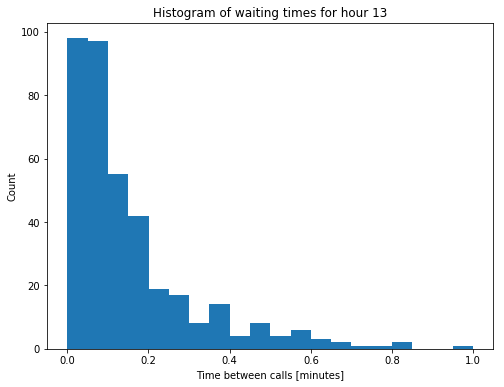

In [7]:
#Setting the hour to 13 and plotting the data for that hour

hour_index = 13

waiting_times_hour = waiting_times_per_hour[hour_index]

plt.figure(figsize=(8, 6))
plt.hist(waiting_times_hour, bins=20)
plt.xlabel('Time between calls [minutes]')
plt.ylabel('Count')
plt.title(f'Histogram of waiting times for hour {hour_index}')
plt.show()

In [0]:
#Defining the data I will input to the model
#I reused the values for alpha and beta from the class activity

#I include the data for the 13th hour in the dictionary
#I also add the length of the data because I will need to loop for the likelihood

data = {
    'alpha': 1,
    'beta': 0.25,
    'waiting_times': waiting_times_hour,
    'length': len(waiting_times_hour)
}

In [0]:
stan_code = """
data {
    real<lower=0> alpha; // prior parameter alpha 
    real<lower=0> beta;  // prior 
    int<lower=1> length; // the length of the data
    real<lower=0> waiting_times[length]; // the data

}

parameters {
    real<lower=0> lambda; // since lambda is generated in the model I add it here

}

model {
    lambda ~ gamma(alpha, beta); // prior distribution for parameter lambda
    for(i in 1:length) {
      waiting_times[i] ~ exponential(lambda); // likelihood over the data that takes lambda as a parameter
    }
  }

"""

In [10]:
#The code to compile and run the model

stan_model = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_49cd966a79621b2be7df0ead66b1484e NOW.


In [0]:
#Putting the data inside the model

stan_results = stan_model.sampling(data=data)

In [13]:
#Printing the results

print(stan_results)

Inference for Stan model: anon_model_49cd966a79621b2be7df0ead66b1484e.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
lambda   6.35  8.1e-3   0.32   5.74   6.13   6.34   6.56   7.01   1604    1.0
lp__   324.42    0.02   0.71 322.44 324.26  324.7 324.87 324.92   1953    1.0

Samples were drawn using NUTS at Fri Oct 18 19:53:38 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [0]:
#Generating samples

samples = stan_results.extract()

Posterior 98% confidence interval for posterior lambda: [5.62591645 7.11640486]


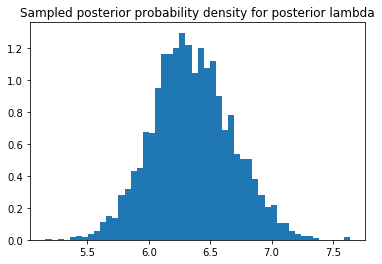

In [21]:
#Plotting the 98% confidence interval for posterior lambda and creating a histogram

plt.hist(samples['lambda'], bins=50, density=True)
plt.title('Sampled posterior probability density for posterior lambda')
print(
    "Posterior 98% confidence interval for posterior lambda:",
    np.percentile(samples['lambda'], [1, 99]))
plt.show()

## Question 2

In [17]:
#Defining the data for the second task and printing its features

dataset = np.array([3.54551763569501, 4.23799861761927, 4.72138425951628, -0.692265320368236, 3.04473513808788, 3.10721270732507, 3.42982225852764, 3.12153903971176, 3.60532628639808, 2.46561737557325, 1.64059465916131, 2.4621623937158, 2.76744495617481, 2.11580054750407, 5.14077208608354, 4.90288499104252, 1.43357579078348, 4.78997817363558, 1.93633438207439, 2.43698838097178, 3.95389148701877, 2.4242295507716, 2.90256268679023, 2.90931728045901, 0.658072819386888, 3.05946763895983, 3.42615331539605, 2.68842833004417, 2.35850130765166, 2.20014998540933, 4.73846511350084, 4.19839721414451, 2.11805510171691, -0.572742936038015, 0.389413982010623, 3.87846130744249, 1.34057656890858, 0.7235748351719, 5.11042369840174, 4.00747556696571, 3.18080956726965, 3.24677964069676, 5.1154659863626, 1.80276616697155, 0.305877679021404, -0.449168307882718, 4.63705561194774, 1.37783714058301, 4.9608149859515, 6.7764195802069, 1.75515522922399, 7.04457337435215, 0.625185284955128, 2.25130734369064, 2.19770178119255, 2.16858257249432, 6.25367644481438, 0.116081323476489, 2.06315857864341, 1.82409781471718, 5.15226741230987, 2.03408231293173, -1.12450854337596, 5.03511270642234, 2.03841989653263, 5.80911741751597, 2.31718128783245, 4.97575010580997, 3.34262752222776, -0.786983904253601, 0.777362359850013, 0.975825009321195, 3.76354577515958, 7.27215002907876, 1.35404089480189, 3.76567940257157, 3.48573993343334, 1.85976988586156, 1.93567061960716, 5.31071812003942, 2.96832987672751, 3.32378908637275, 2.61631960054551, 5.80897964052825, 4.95215217171488, 1.32036772796131, 3.79932542233371, 3.08108492766309, 2.6734110081666, -0.14251851138521, 2.48744375588965, 3.98463042123415, 6.32781680028, 4.0029172024315, 4.23210369459457, 1.71412938967325, 5.16492114963802, 2.53409673107906, 4.77346963973334, 3.34088878725551, 4.77681472750664, 3.81135755590976, 1.14054269983137, 1.42057452397702, 0.132142311125433, 7.12577254064672, 4.85422012781764, 4.15745720676399, 4.48763147363348, 1.56060322283629, 2.64821761542887, 1.26655351354548, 4.48497722937931, 4.3286302403783, 4.26157679512625, 4.0597558651364, 5.14051109132496, 2.5660348362221, 1.10764013818617, 0.386889523012303, 3.54150473246237, 3.57480214382351, 1.95150869584847, 2.70688970563118, 2.47971849820016, 6.50838037000679, 4.01511556826974, 1.11562740835344, 5.02637639472439, 4.38184491686864, 5.60423144047386, 2.40067408379298, 5.7849941378344, 2.37225791084559, 6.86031465910273, 4.09214858239736, 6.85994063692621, 3.62202415158781, -1.11220646958158, 3.73920971696866, 3.24533871512216, 1.28724203643002, 0.291152541773164, 0.368630935755111, 6.71607270510525, 5.42278455200833, 5.35188416119281, 2.305874586163, -1.85878097203032, 2.69877382351447, 4.84121860550417, 4.40973060799391, 5.04399320650774, 2.68632252661298, 6.06531610659912, 3.11881325011993, 3.45532087005125, 3.08442259840346, 4.43564424136733, 2.84252623135804, 1.50536798885106, 1.48868622407603, 2.07322837615663, 2.5476910210998, 5.66941808257884, 2.16731067416426, 2.49843958833905, 3.94586413879977, 0.316433764679541, -0.608937441815983, 2.5943436558557, 1.05516869528337, 2.1447601332725, 6.65846634141906, 2.1771555267834, 5.23953812029442, 3.53629759842647, 6.03263538017003, 3.85739159396599, 5.95093453004638, 1.12856987160476, 3.5559912886093, 2.21974864244489, 3.38471394882135, -1.90805399279409, 3.5113699258973, 4.49319955412346, 5.10507952638867, 1.08277895384184, 4.58403638422759, 1.37304994426824, 4.17566975753523, 3.36454182510378, 0.177136582644021, 2.91337423388405, 3.22796455457526, 2.80124198378441, 1.95189718582788, 3.37659263896246, -1.6463045238231])
print(len(dataset), "data")

200 data


In [0]:
stan_code_2 = """
data {
    real<lower=0> mu_0; // parameters for the prior 
    real<lower=0> nu_0; // parameters for the prior
    real<lower=0> alpha_0; // parameters for the prior
    real<lower=0> beta_0; // parameters for the prior
    int<lower=1> length; // defining the length of the data
    real observations[length]; // defining the data

}

parameters {
    real mu_1; // Parameters to be generated
    real<lower=0> sigma2; // Parameters to be generated

}

model {
    sigma2 ~ inv_gamma(alpha_0, beta_0); // making the defining sigma2 to be distributed with inverse gamma
    mu_1 ~ normal(mu_0, sqrt(sigma2/nu_0)); // Normal distribution that also takes sigma2 as a parameter. These two make the prior
    for(i in 1:length) {
      observations[i] ~ normal(mu_1, sqrt(sigma2)); // Likelihood distributed with a normal distribution
    }
  }

"""

In [0]:
#Defining the data to be inputted

data_2 = {
    'mu_0': 0,
    'nu_0': 0.054,
    'alpha_0': 1.12,
    'beta_0': 0.4,
    'length': len(dataset),
    'observations': dataset
}

In [20]:
#Compiling and running the model

stan_model_2 = pystan.StanModel(model_code=stan_code_2)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_702fae812729993b93b7c0effe734118 NOW.


In [0]:
#Inserting the data into the model

stan_results_2 = stan_model_2.sampling(data=data_2)

In [24]:
#Printing the results

print(stan_results_2)

Inference for Stan model: anon_model_702fae812729993b93b7c0effe734118.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu_1     3.06  2.3e-3   0.13    2.8   2.97   3.07   3.16   3.32   3322    1.0
sigma2   3.62  5.9e-3   0.35   2.99   3.37   3.59   3.85   4.36   3583    1.0
lp__   -233.2    0.02   1.01 -235.8 -233.6 -232.9 -232.5 -232.2   1926    1.0

Samples were drawn using NUTS at Fri Oct 18 19:55:54 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [0]:
#Getting samples

samples_2 = stan_results_2.extract()

In [54]:
#Printing the 95% posterior confidence intervals for μ and σ²

print("Posterior 95% confidence interval for posterior μ:", np.percentile(samples_2['mu_1'], [2.5, 97.5]))
print("Posterior 95% confidence interval for posterior σ²:", np.percentile(samples_2['sigma2'], [2.5, 97.5]))

Posterior 95% confidence interval for posterior μ: [2.80013853 3.32068837]
Posterior 95% confidence interval for posterior σ²: [2.99305708 4.36200136]


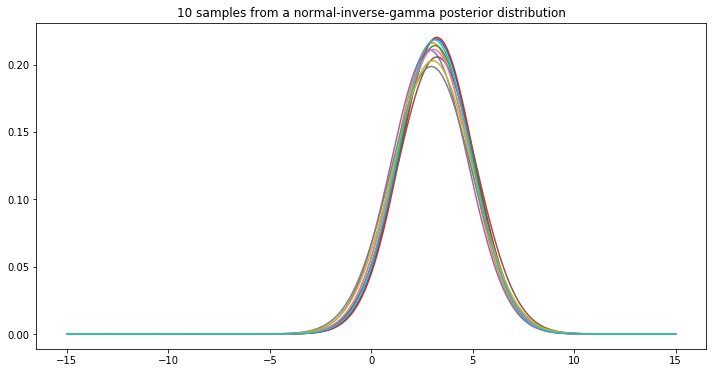

In [29]:
#Plotting the 10 samples

plt.figure(figsize=(12, 6))
plot_x = np.linspace(-15, 15, 500)

for i in range(10):
  plot_y = stats.norm.pdf(plot_x, loc=samples_2['mu_1'][i], scale=np.sqrt(samples_2['sigma2'][i]))
  plt.plot(plot_x, plot_y)
  
plt.title('10 samples from a normal-inverse-gamma posterior distribution')
plt.show()

## Question 3

In [31]:
#Uploading the last dataset

from google.colab import files
uploaded = files.upload()

Saving hrtem.csv to hrtem.csv


In [32]:
#Loading the data

hrtem = np.loadtxt(io.StringIO(uploaded['hrtem.csv'].decode('utf-8')))
print('%i data, min: %f, max: %f' % (len(hrtem), min(hrtem), max(hrtem)))

500 data, min: 1.051827, max: 28.942578


In [0]:
#Taking the log transformation of the data

log_hrtem = np.log(hrtem)

In [0]:
#for this one I kept the last model the same except for how I named the data since they are both for the same distributions.

stan_code_3 = """
data {
    real<lower=0> mu_0;  
    real<lower=0> nu_0;
    real<lower=0> alpha_0;
    real<lower=0> beta_0;
    int<lower=1> length;
    real hrtem[length];

}

parameters {
    real mu_1;
    real<lower=0> sigma2;

}

model {
    sigma2 ~ inv_gamma(alpha_0, beta_0);
    mu_1 ~ normal(mu_0, sqrt(sigma2/nu_0));
    for(i in 1:length) {
      hrtem[i] ~ normal(mu_1, sqrt(sigma2));
    }
  }

"""

In [0]:
#Defining the data be inputted

data_3 = {
    'mu_0': 2.3,
    'nu_0': 0.1,
    'alpha_0': 2,
    'beta_0': 5,
    'length': len(log_hrtem),
    'hrtem': log_hrtem
}

In [36]:
#Compiling and running the model

stan_model_3 = pystan.StanModel(model_code=stan_code_3)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_76773e013eb90672363918a7b21528d0 NOW.


In [0]:
#Inserting the data and the parameter values to the model

stan_results_3 = stan_model_3.sampling(data=data_3)

In [40]:
#Printing results

print(stan_results_3)

Inference for Stan model: anon_model_76773e013eb90672363918a7b21528d0.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu_1     1.89  5.2e-4   0.03   1.83   1.87   1.89   1.91   1.96   3808    1.0
sigma2    0.5  5.6e-4   0.03   0.44   0.47    0.5   0.52   0.56   3346    1.0
lp__   -76.07    0.03   1.08 -79.09 -76.48 -75.72 -75.32 -75.04   1793    1.0

Samples were drawn using NUTS at Fri Oct 18 20:07:13 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [0]:
#Getting samples

samples_3 = stan_results_3.extract()

In [55]:
#Printing the 95% posterior confidence intervals for μ and σ²

print("Posterior 95% confidence interval for posterior μ:", np.percentile(samples_3['mu_1'], [2.5, 97.5]))
print("Posterior 95% confidence interval for posterior σ²:", np.percentile(samples_3['sigma2'], [2.5, 97.5]))

Posterior 95% confidence interval for posterior μ: [1.83056187 1.95518808]
Posterior 95% confidence interval for posterior σ²: [0.43562501 0.56443696]


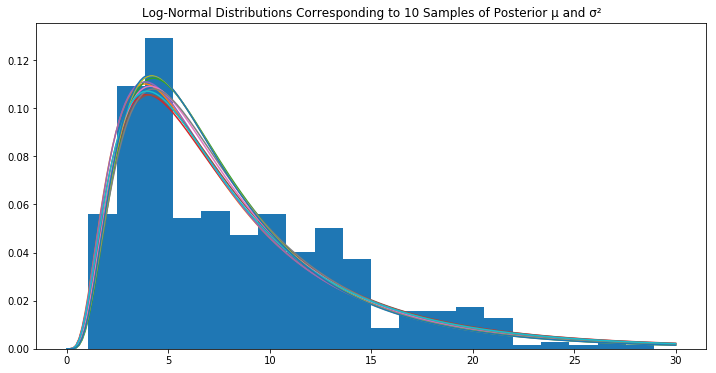

In [53]:
#Plotting the results

plt.figure(figsize=(12,6))
plt.hist(hrtem, bins=20, density=True)
plot_x = np.linspace(0, 30, 200)

for i in range(0, 10):
  plot_y = stats.lognorm.pdf(plot_x, np.sqrt(samples_3['sigma2'][i]), scale=np.exp(samples_3['mu_1'][i]))
  plt.plot(plot_x, plot_y)

  
plt.title('Log-Normal Distributions Corresponding to 10 Samples of Posterior μ and σ²')  
plt.show()